In [73]:
import numpy as np
import matplotlib.pyplot as plt

Define some variables for later

In [74]:
NUM_TRIALS = 10
NUM_GOLDFISH = 10_000
SELL_PRICE = 1000

Test reserve price distribution generation

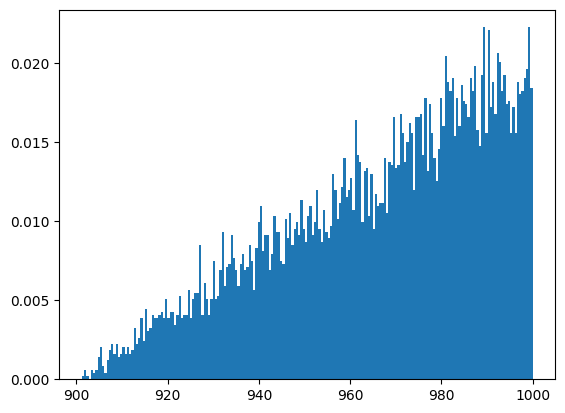

966.6083257842165

In [75]:
rng = np.random.default_rng()
reserve_prices = rng.triangular(left=900, mode=1000, right=1000, size=NUM_GOLDFISH)
h = plt.hist(reserve_prices, bins=200,
             density=True)
plt.show()
np.mean(reserve_prices)

Monte Carlo simulation

In [76]:
LOW_BID = 952
HIGH_BID = 978

rand_seeds = np.arange(1, 11)
num_bid_accepts = np.full((NUM_TRIALS, ), NUM_GOLDFISH)
total_profits = np.zeros(NUM_TRIALS)

for t in range(NUM_TRIALS):
    rng = np.random.default_rng(seed=rand_seeds[t])
    reserve_prices = rng.triangular(left=900, mode=1000, right=1000, size=NUM_GOLDFISH)
    total_profit = 0
    for r in reserve_prices:
        if LOW_BID >= r:
            total_profit += SELL_PRICE - LOW_BID
        elif HIGH_BID >= r:
            total_profit += SELL_PRICE - HIGH_BID
        else:
            num_bid_accepts[t] -= 1
    total_profits[t] = total_profit

In [77]:
total_profits

array([203370., 204114., 205542., 202486., 205768., 205544., 203506.,
       199334., 204434., 202786.])

In [78]:
num_bid_accepts

array([6065, 6048, 6094, 6052, 6135, 6113, 6044, 6034, 6098, 6081])

Average profit per trade

In [79]:
np.mean(total_profits) / np.mean(num_bid_accepts)

33.52122967546574

Average profit per fish

In [80]:
np.mean(total_profits) / NUM_GOLDFISH

20.36884